In [ ]:
#Installing the dependencies#
!pip install ultralytics==8.0.20
!pip install roboflow --quiet
import os
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
os.getcwd()
HOME = os.getcwd()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.6/78.2 GB disk)


# Yolov8 Training and Model Saving

In [ ]:
#Annotated dataset#
HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#Dataset key from roboflow#
rf = Roboflow(api_key="NADQgoMx6u7n2Mg3BQWx")
project = rf.workspace("crystaltracking").project("ipak4tracking")
dataset = project.version(1).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to iPak4Tracking-1 in yolov8:: 100%|██████████| 4664/4664 [00:00<00:00, 9560.20it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True batch=32 patience=0 #batch=16 patience=50 lr0=0.01

/content
100% 131M/131M [00:02<00:00, 47.5MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/iPak4Tracking-1/data.yaml, epochs=200, patience=0, batch=32, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
import shutil
shutil.rmtree('/content/runs/detect/train4')

/content


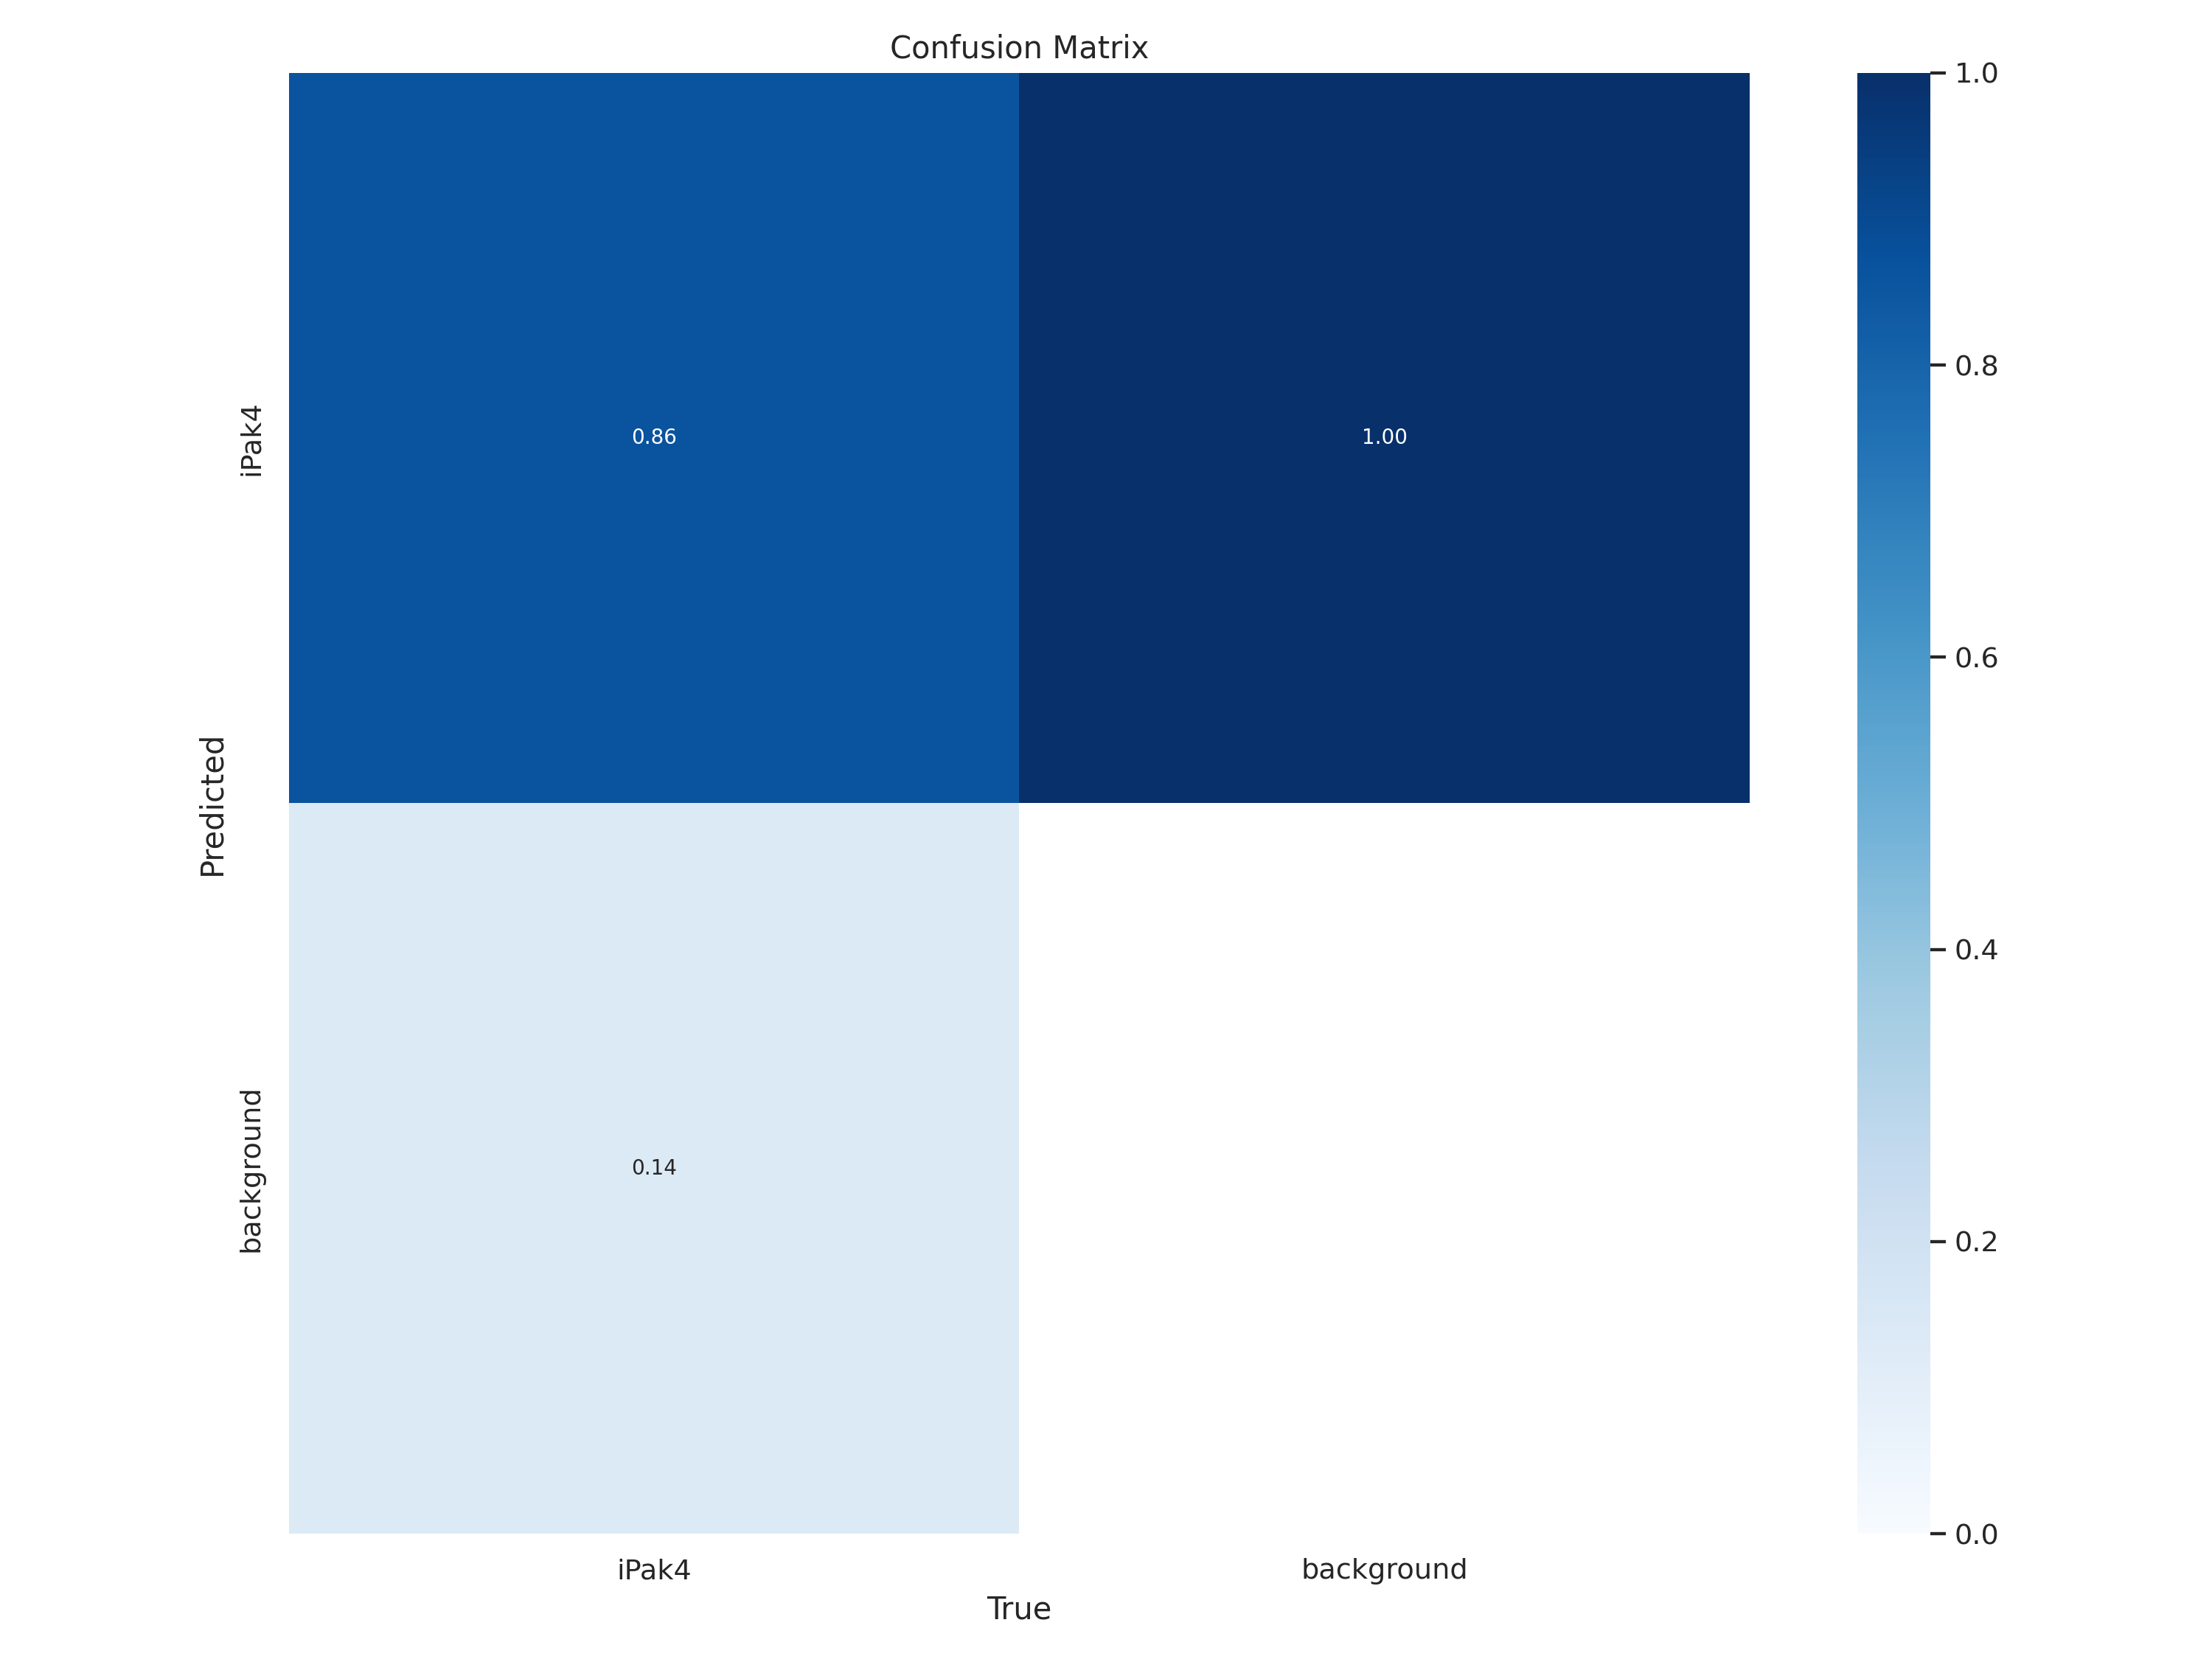

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

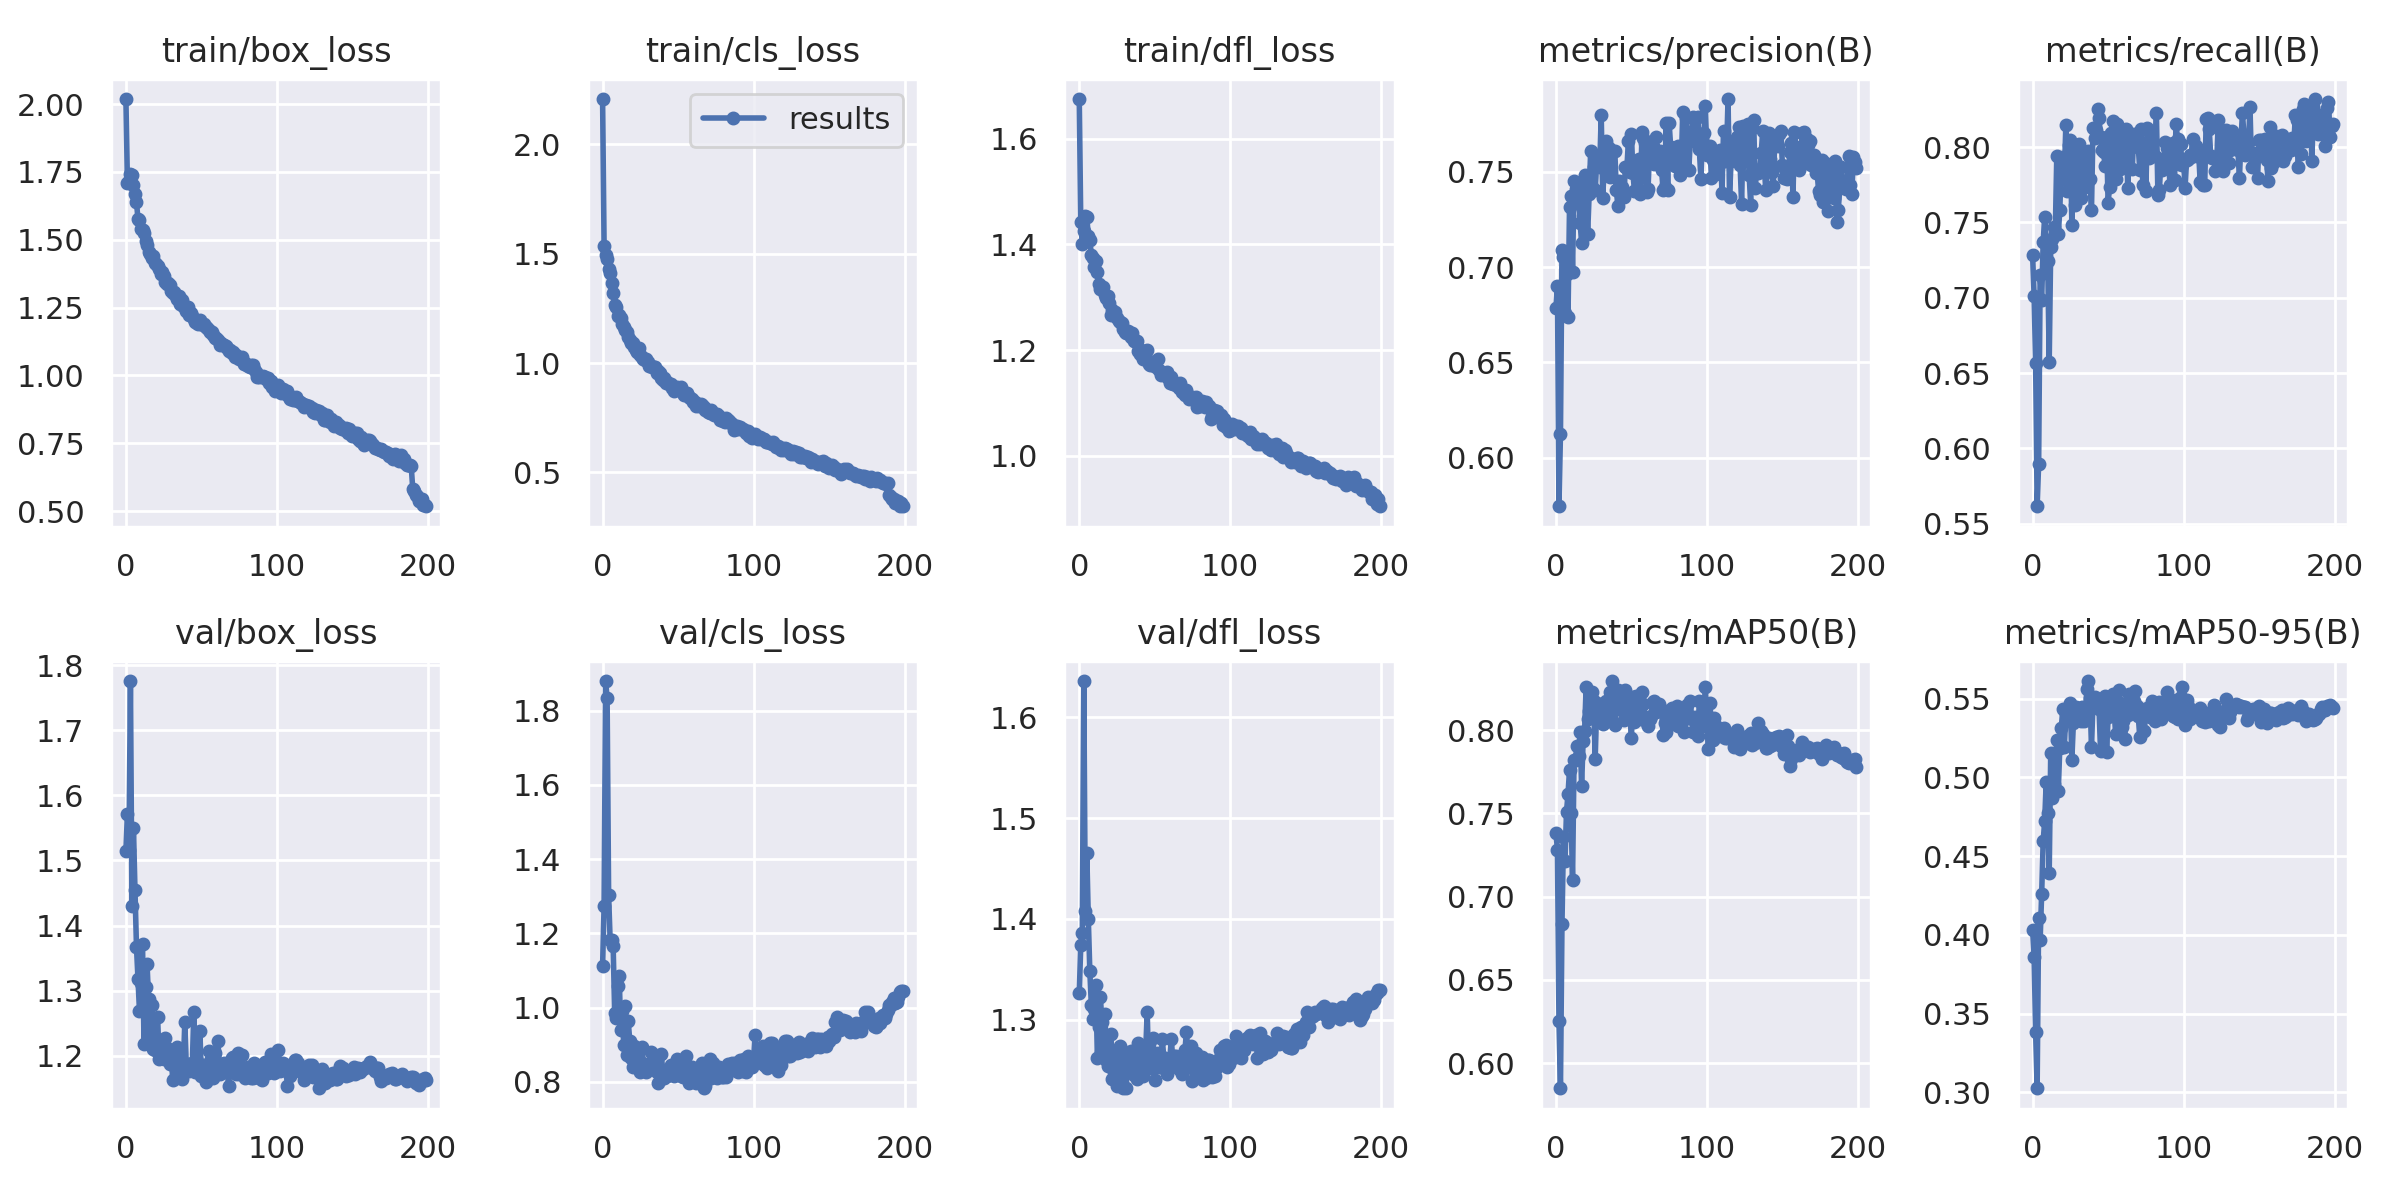

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

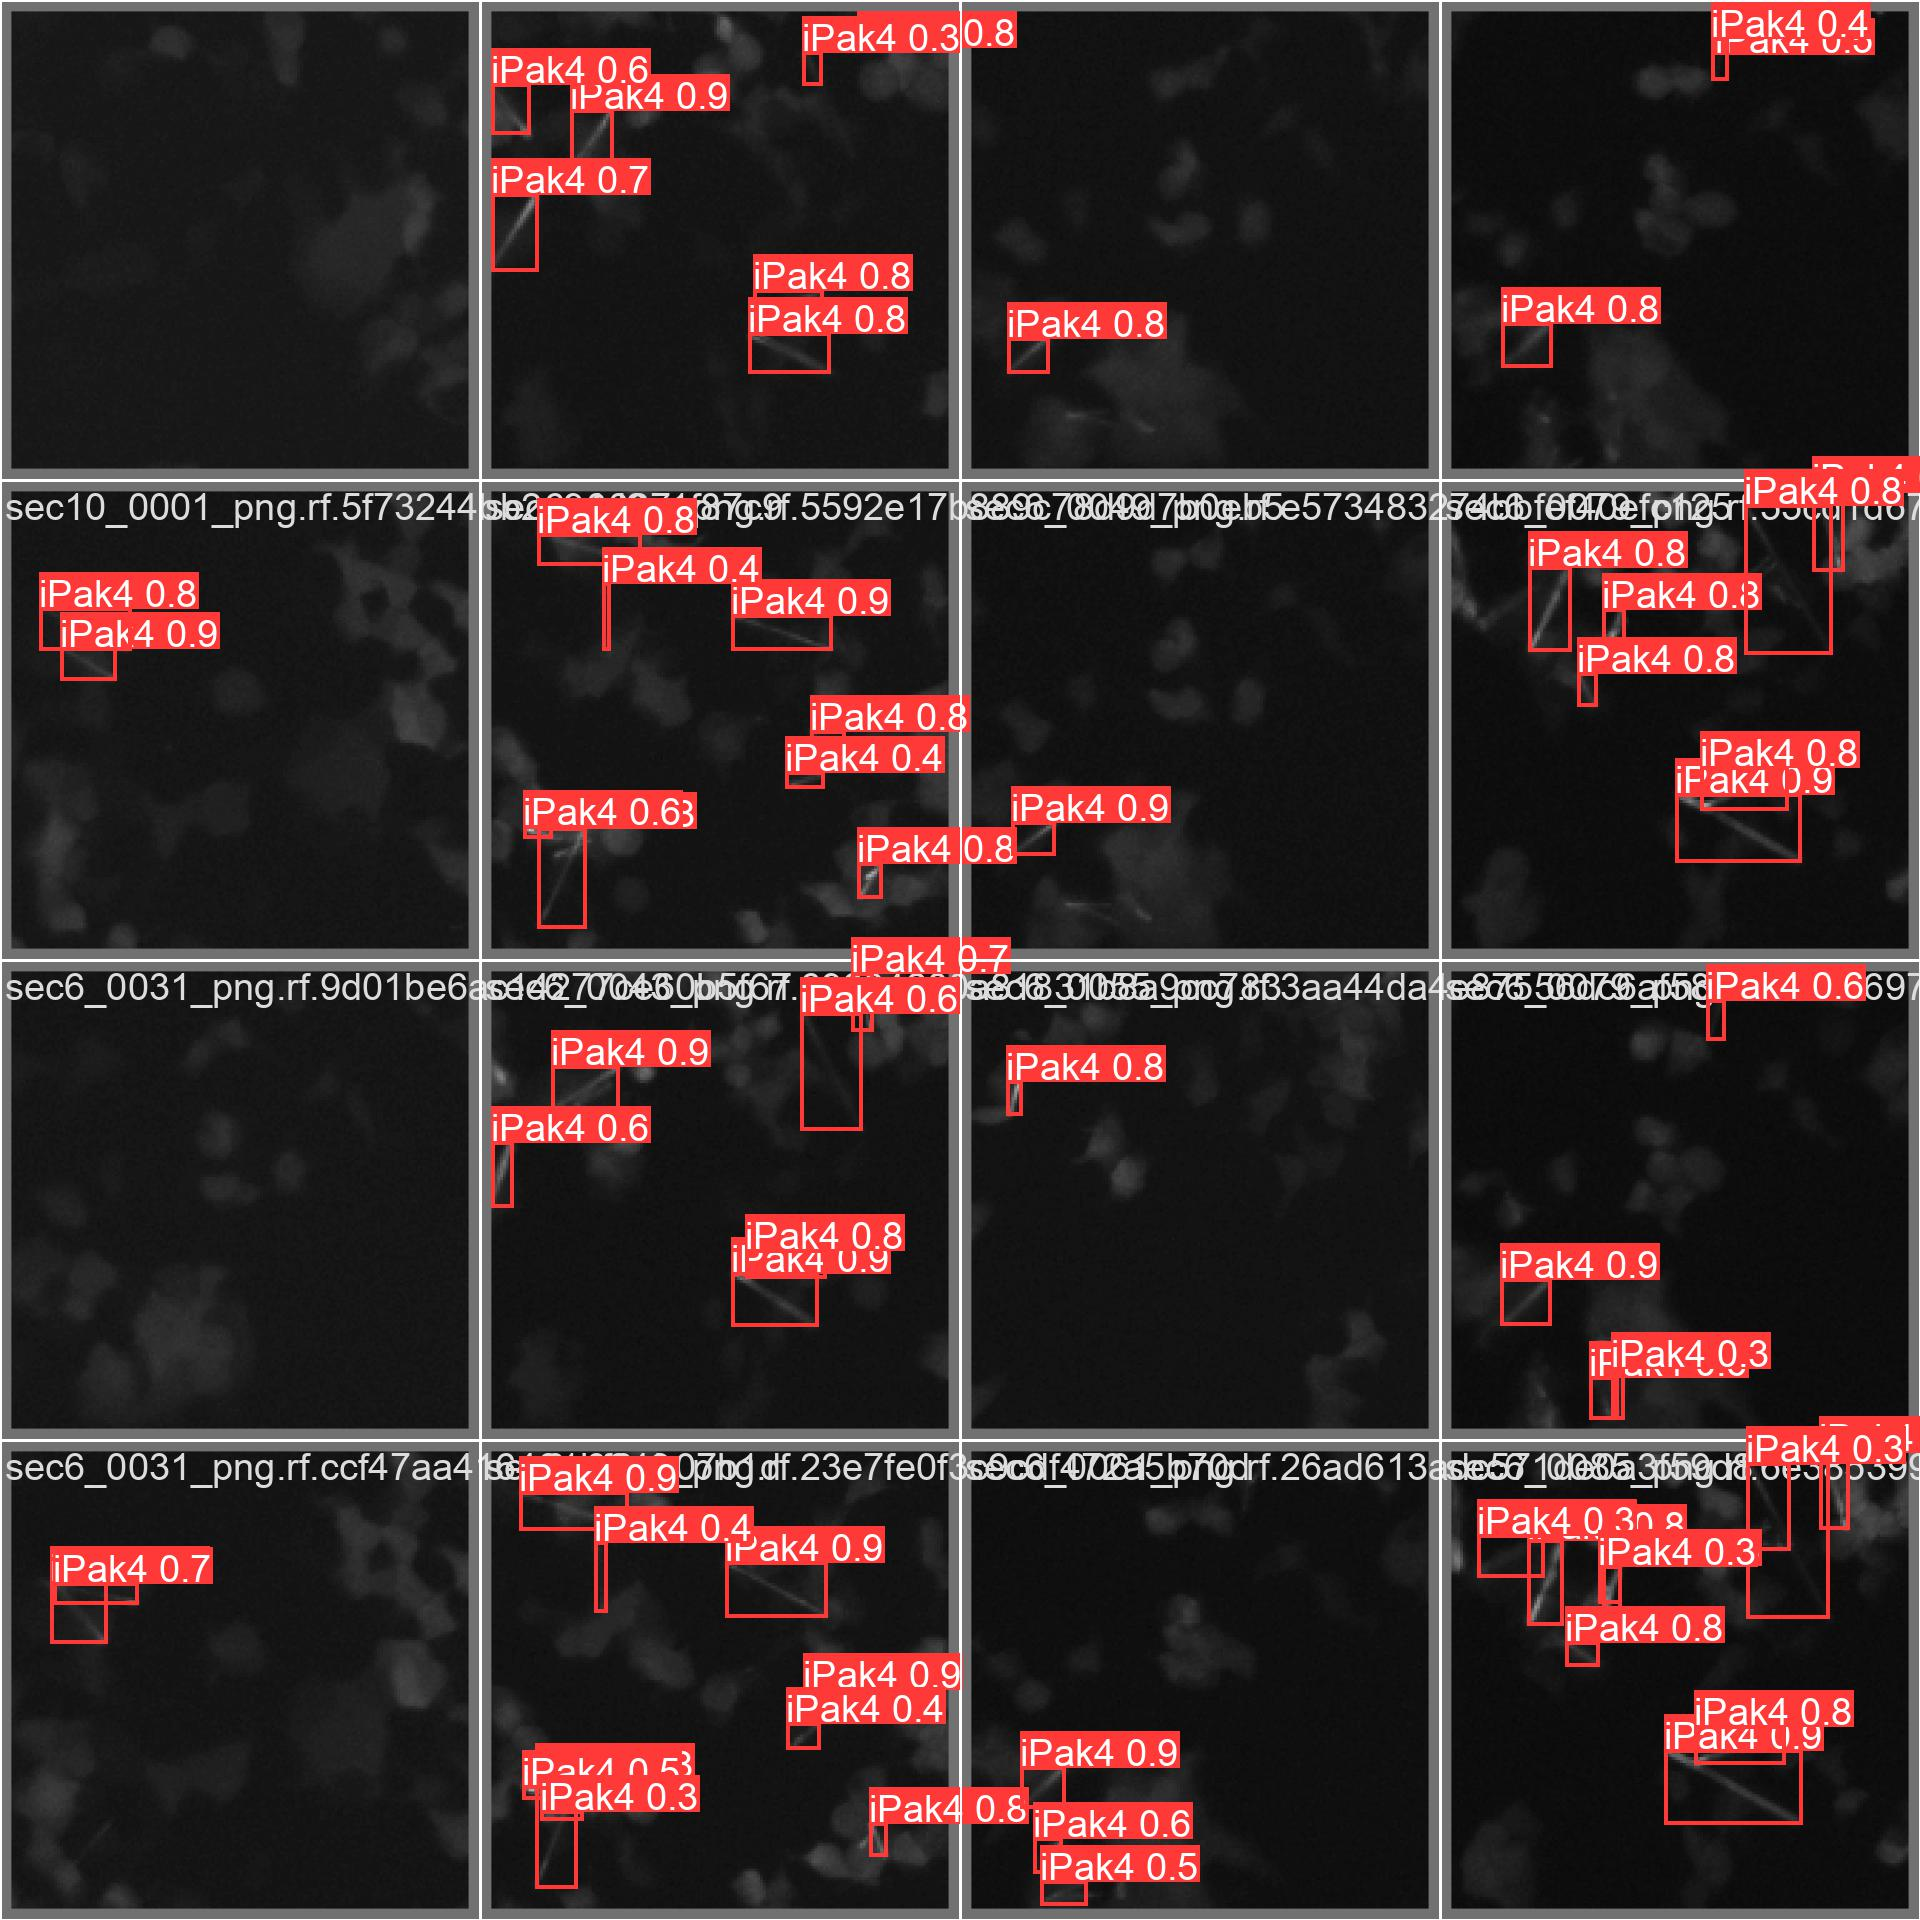

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/iPAK4GrouthTracking_160160-1/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.09it/s]
                   all         26         74      0.768      0.762      0.822      0.542
Speed: 3.6ms pre-process, 4.3ms inference, 0.0ms loss, 0.9ms post-process per image


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/sec10_181_png.rf.ecf7a57aa064e23b3c92078583e2aa9e.jpg: 800x800 1 iPAK4, 14.9ms
image 2/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/sec10_221_png.rf.04779645f0fe731ef3a0dab0293cf833.jpg: 800x800 2 iPAK4s, 14.8ms
image 3/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/sec10_231_png.rf.ae2af09a3b84028ef29e16f0e559cdab.jpg: 800x800 5 iPAK4s, 15.2ms
image 4/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/sec5_191_png.rf.6090f3b5553fdf69df24cc4bac9773d1.jpg: 800x800 3 iPAK4s, 14.6ms
image 5/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/sec5_241_png.rf.f6fa7264ce377be5fe097ad3af99daea.jpg: 800x800 5 iPAK4s, 15.0ms
image 6/14 /content/datasets/iPAK4GrouthTracking_160160-1/test/images/se

In [ ]:
model = YOLO('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/v8n_100ep/best_v8n_32batch.pt')
model.model.names

{0: 'iPak4'}

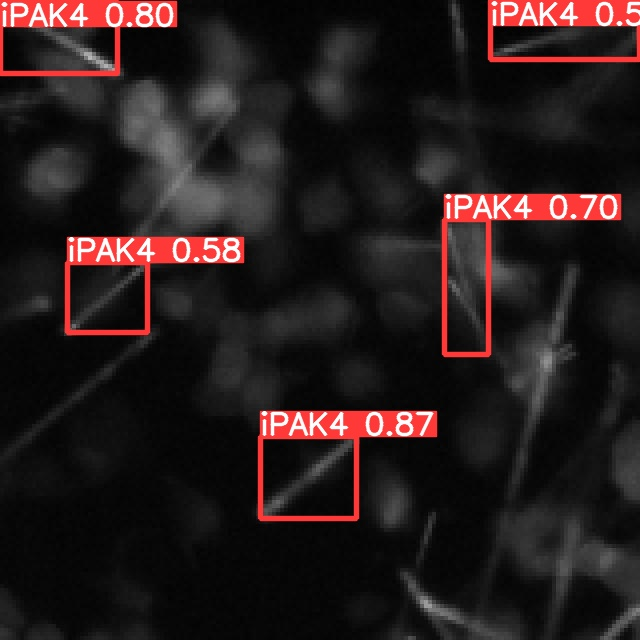

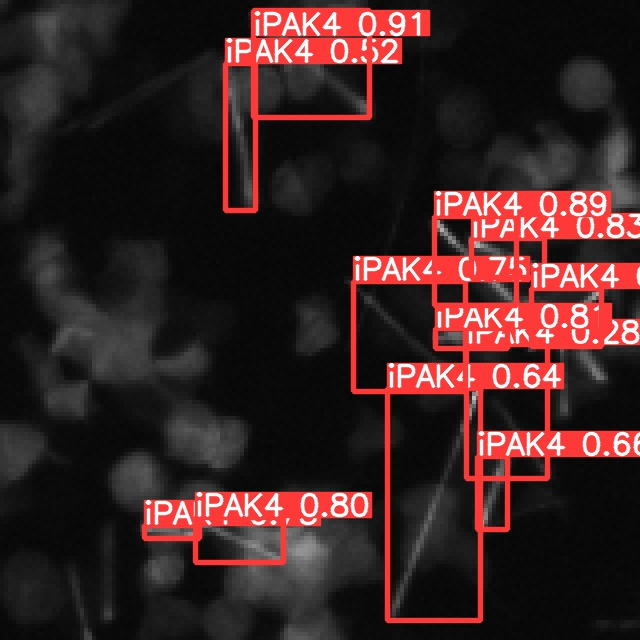

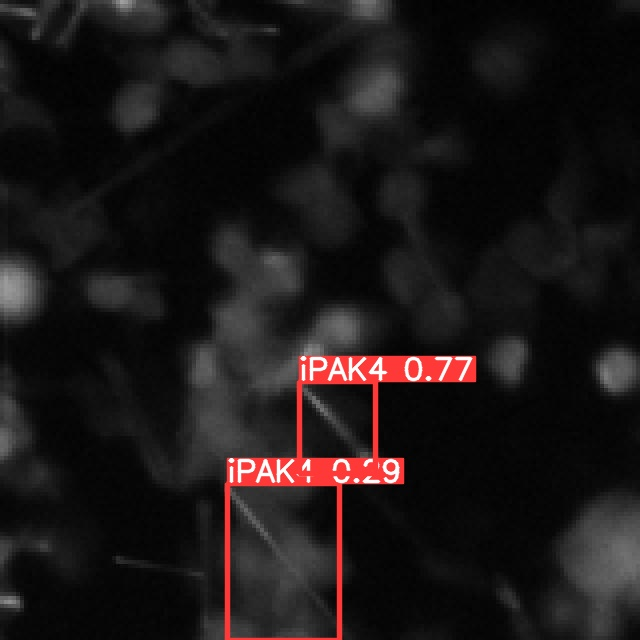

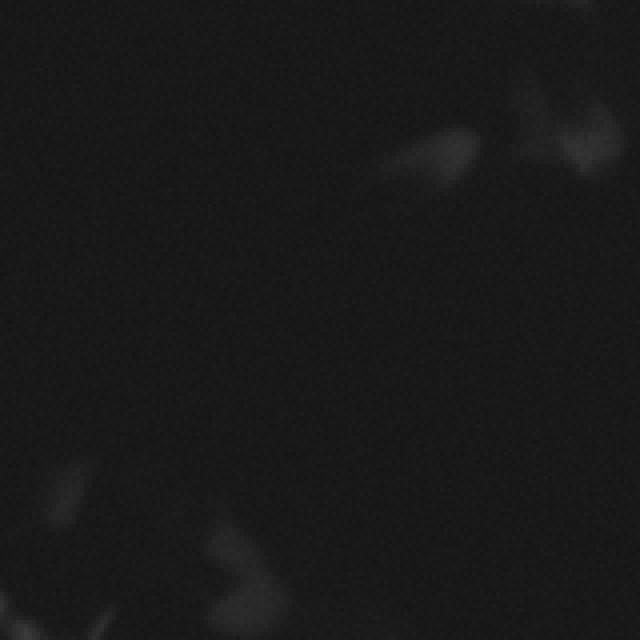

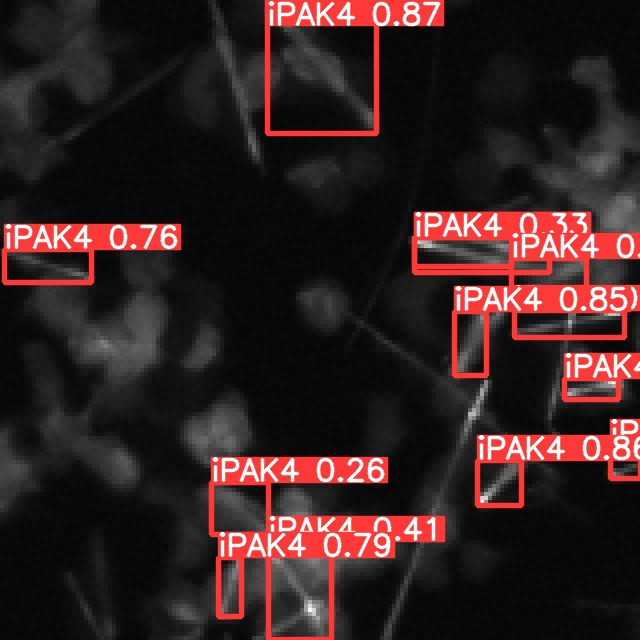

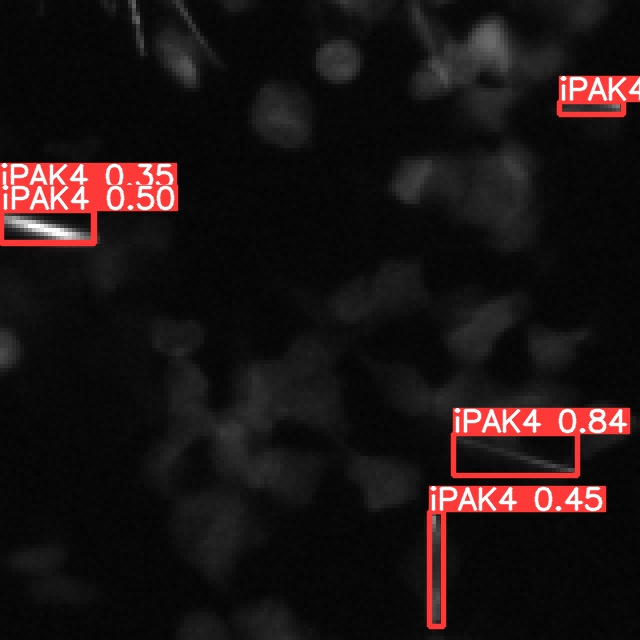

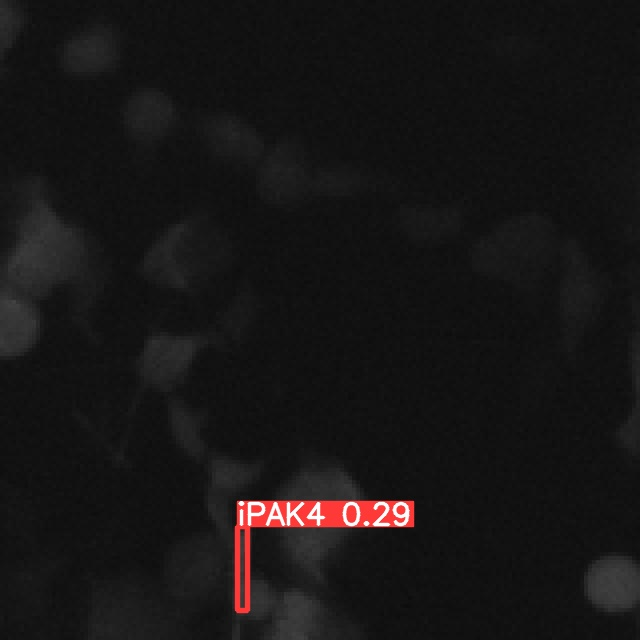

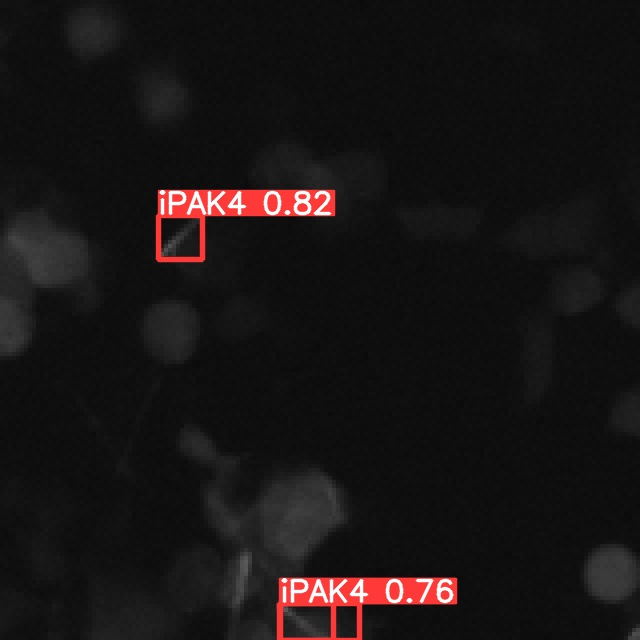

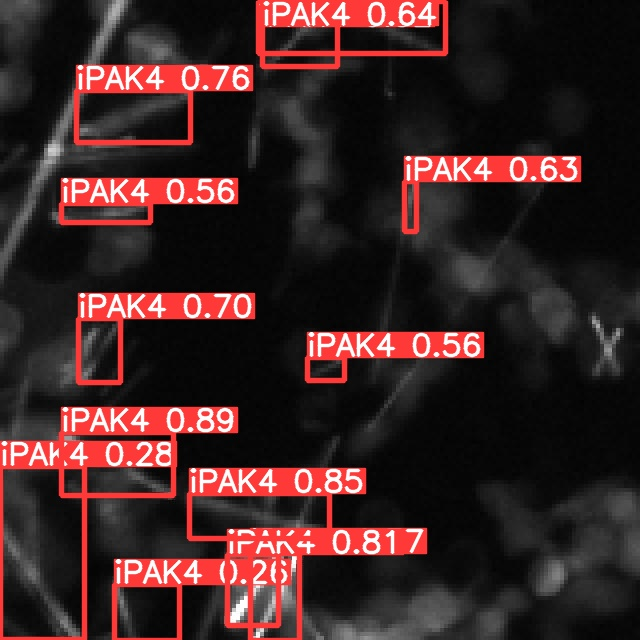

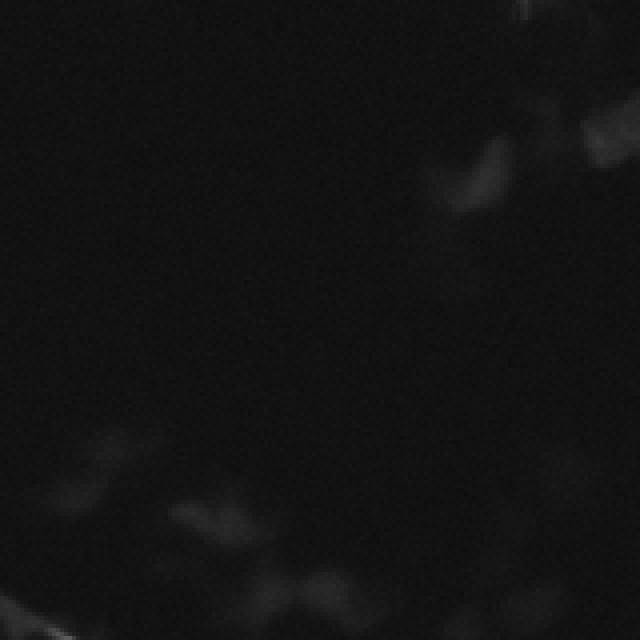

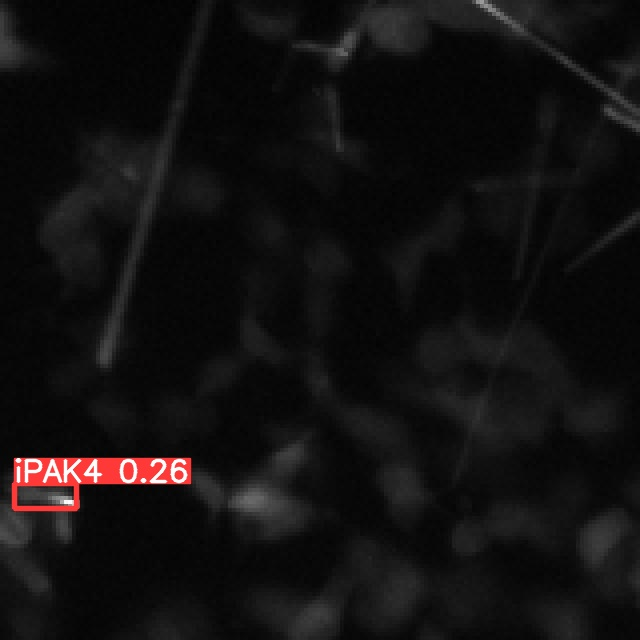

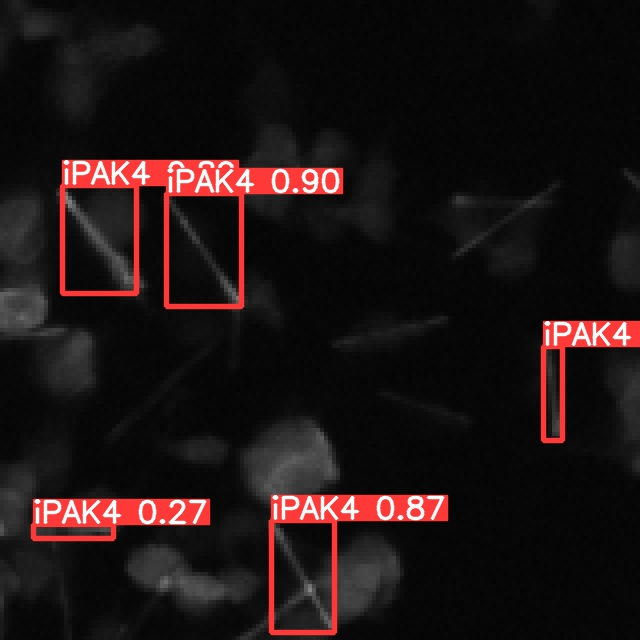

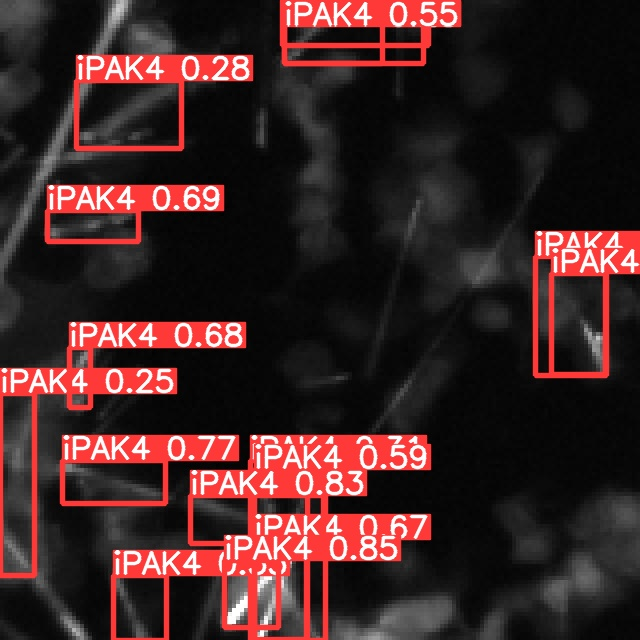

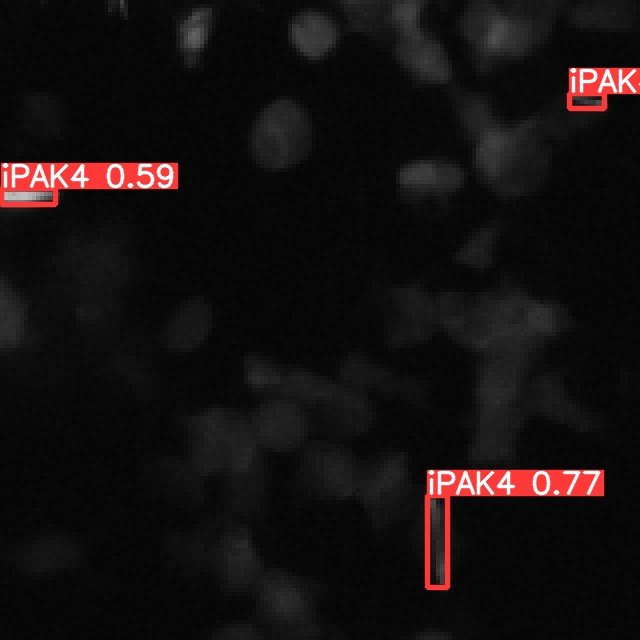

In [ ]:
from IPython.display import Image, display

for image_path in os.listdir('/content/runs/detect/predict2'):
      display(Image(filename='/content/runs/detect/predict2/'+image_path, width=600))
      print("\n")

# ByteTrack Initializting

In [ ]:
import shutil
shutil.rmtree('/content/ByteTrack')

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!pip install loguru
!pip install scikit-image
!pip install tqdm
!pip install onnx==1.8.1
!pip install onnxruntime==1.8.0
!pip install onnx-simplifier==0.3.5
!pip install Pillow
!pip install thop
!pip install ninja
!pip install tabulate
!pip install tensorboard
!pip install lap
!pip install motmetrics
!pip install filterpy
!pip install
!cd ByteTrack && pip3 install -q -r requirements.txt
!cd ByteTrack && python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25 #default 0.25
    track_buffer: int = 35#default 30
    match_thresh: float = 0.90 #default 0.8
    aspect_ratio_thresh: float = 3.0 #default 3.0
    min_box_area: float = 1.0 #default 1.0
    mot20: bool = False


In [ ]:
!pip install supervision==0.1.0
import supervision
print("supervision.__version__:", supervision.__version__)
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
supervision.__version__: 0.1.0


In [ ]:
from typing import List
# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))

# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)

# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

#Extract BBOX from each id in each frame

In [ ]:
#Extracing BBOX from each id in each frame Version#
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
working_path = '/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/v8m_100ep' #Folder of your current model
#Predicting the video content#
def video_generator(path,model,videoid,target_info):
  # dict maping class_id to class_name
  CLASS_NAMES_DICT = model.model.names
  # class_ids of interest - can be checked from the model class
  CLASS_ID = [0] # Here 0 is the cell and 1 is the protein
  # create frame generator
  SOURCE_VIDEO_PATH = path+'/InputVideo/'+videoid

  # set the output
  TARGET_VIDEO_PATH = '%s/%s_result.mp4'%(path,videoid[:-4])
  VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

  from tqdm.notebook import tqdm
  # create BYTETracker instance
  byte_tracker = BYTETracker(BYTETrackerArgs())
  # create VideoInfo instance
  video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
  # create frame generator
  generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
  # create instance of BoxAnnotator
  box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=1)

  
  # open target video file
  with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
      Fiber_info = {} # Initialize a new dictionary to record the length change in each frame for each fiber

      # loop over video frames
      frame_n = 0
      for frame in tqdm(generator, total=video_info.total_frames):
        
          # model prediction on single frame and conversion to supervision Detections
          results = model(frame)
          detections = Detections(
              xyxy=results[0].boxes.xyxy.cpu().numpy(),
              confidence=results[0].boxes.conf.cpu().numpy(),
              class_id=results[0].boxes.cls.cpu().numpy().astype(int)
          )
          
          # filtering out detections with unwanted classes
          mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # tracking detections
          tracks = byte_tracker.update(
              output_results=detections2boxes(detections=detections),
              img_info=frame.shape,
              img_size=frame.shape
          )
          tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
          detections.tracker_id = np.array(tracker_id)
          # filtering out detections without trackers
          mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # format custom labels
          
          labels = [
              f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
              for _, confidence, class_id, tracker_id
              in detections
          ]
          
          # Recording the information of target in this frame
          
          #print(detections.xyxy.shape) #The shape is (1,n), so two index should be input to locate the coordinates
          # Iterating each target id
          for idx_fiber in range(len(detections.tracker_id)):
            # In case the target occurs for the first time
            if detections.tracker_id[idx_fiber] not in Fiber_info.keys():
              Fiber_info[detections.tracker_id[idx_fiber]] = []
            info = np.append(detections.xyxy[idx_fiber],frame_n)
            Fiber_info[detections.tracker_id[idx_fiber]].append(info)
            


            # Sice the Image bounded by BBOX
            
          frame_n +=1
          # annotate and display frame
          frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
          sink.write_frame(frame)

  target_info = Fiber_info  
  return target_info
  #videoid = os.listdir('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/InputVideo')



#Generating the tracking files 
videoid = ['section12.mp4']
Fiber_info ={}

#Load-in the pretrained YOLO model
MODEL_weight = '%s/best.pt'%(working_path)
model = YOLO(MODEL_weight)
model.fuse()
for vid in videoid:
  
  Fiber_info = video_generator(working_path,model,vid,Fiber_info)
  
  #Save the data points into numpy file
  if not os.path.exists('%s/%s'%(working_path,vid[:-4])):
    os.mkdir('%s/%s'%(working_path,vid[:-4]))

  np.save('%s/%s/%s.npy'%(working_path,vid[:-4],vid[:-4]),Fiber_info)


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


  0%|          | 0/264 [00:00<?, ?it/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


In [ ]:
#Installing dependencies#
import os
import cv2 as cv
from PIL import Image
import numpy as np
from matplotlib.figure import figaspect
from skimage.transform import radon, rescale
import csv



def generate_result(videoid,crystal_id):
  # open target video file
  from tqdm.notebook import tqdm
  # create VideoInfo instance
  SOURCE_VIDEO_PATH = working_path+'/InputVideo/'+videoid+'.mp4'
  video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
  # create frame generator
  generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
  # define the saved video location
  Saved_path = working_path+'/'+videoid+'/Crystal%s_radon_result.mp4'%crystal_id
  # load in the pre-saved tracking inforamtion
  tracking_info = np.load('%s/%s/%s.npy'%(working_path,videoid,videoid), allow_pickle=True).item()
  frame_id = 0
  distances=[]
  video = cv.VideoWriter(Saved_path,cv.VideoWriter_fourcc(*"mp4v"),20,(500,500)) #(int(target[1].split('x')[0]),int(target[1].split('x')[1]))
  plt.ion()

  with open("%s.csv"%(Saved_path[:-4]),"w") as csvfile: 
    writer = csv.writer(csvfile)
    #Define the column name
    writer.writerow(["Frame","Distance(In Pixel)"])
    for frame in tqdm(generator, total=video_info.total_frames):
      #print(frame_id)
      if frame_id == int(tracking_info[crystal_id][0][-1]):
        #print(tracking_info[crystal_id][0])
        image = frame[int(tracking_info[crystal_id][0][1]):int(tracking_info[crystal_id][0][3])+1,int(tracking_info[crystal_id][0][0]):int(tracking_info[crystal_id][0][2])+1,:]
        image_sqz = np.empty((image.shape[0],image.shape[1]))
        image_sqz[:,:] = image[:,:,0] 
        
        #Rado Transform#
        with plt.ioff():
          fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))
          ax1.set_title("Original")
          ax1.imshow(image_sqz, cmap=plt.cm.Greys_r)

          #Performing Radon Transform#
          theta = np.linspace(0.,180., max(image_sqz.shape), endpoint=False)
          sinogram = radon(image_sqz, theta=theta)
          #print(sinogram)
          #Finding the maximum value from forward radon transform
          s_ori,a_ori = np.where(sinogram==np.max(sinogram)) #obatin the index of the maximum value in sinogram
          #print(s_ori,a_ori)
          s_ori=s_ori[0];a_ori=a_ori[0]
          #Interpretting the value in real physical meaning
          s = s_ori-sinogram.shape[0]/2 #mapping the index back to the original domain
          a_ori = a_ori*180/sinogram.shape[1] #mapping the index back to the origin
          a = a_ori/180 *np.pi #converting the degree into radian
          #print(s_ori,a_ori,s,a)
          ax2.set_title("Radon transform\n(Sinogram)")
          ax2.set_xlabel("Projection angle (deg)")
          ax2.set_ylabel("Projection position (pixels)")
          ax2.imshow(sinogram, extent=(0, 180, -sinogram.shape[0]/2.0, sinogram.shape[0]/2.0),cmap=plt.cm.Greys_r, aspect='auto')

          #Calculating the function of integration line
          s=-s
          x_intersect = image_sqz.shape[0]//2 + s*np.sin(a); y_intersect = image_sqz.shape[1]//2 - s*np.cos(a)
          b = y_intersect - np.tan(a)*x_intersect

          #Calculating the corresponding pixels on the integration line from x- and y-axes respectively
          x_real = np.asarray([i for i in range(image_sqz.shape[0])])
          y_real = np.asarray([i for i in range(image_sqz.shape[1])])

          x_cal_ceil = np.floor((y_real-b)/(np.tan(a)))
          #x_cal_floor = np.floor((y_real-b)/(np.tan(a)))

          y_cal_ceil = np.ceil(x_real*np.tan(a)+b)
          #y_cal_floor = np.floor(x_real*np.tan(a)+b)

          #filtering the x and y to ensure they lie within the image
          x_filter =[]; y_filter=[]
          y_draw = []; x_draw =[]

          for i in range(len(y_cal_ceil)):
            if y_cal_ceil[i] > 0 and y_cal_ceil[i]<image_sqz.shape[1]:
              y_filter.append(y_cal_ceil[i])
              x_draw.append(x_real[i])

          for i in range(len(x_cal_ceil)):
            if x_cal_ceil[i] > 0 and x_cal_ceil[i]<image_sqz.shape[0]:
              x_filter.append(x_cal_ceil[i])
              y_draw.append(y_real[i])

          

          if len(x_filter)>0 and len(y_filter)>0:

              x_sort = x_filter+x_draw
              y_sort = y_filter+y_draw
              min_pt = np.array([min(x_sort),min(y_sort)])
              max_pt = np.array([max(x_sort),max(y_sort)])
              #min_pt=np.array([x_filter[0],y_filter[0]])
              #max_pt=np.array([x_filter[-1],y_filter[-1]])
              distance = np.linalg.norm(min_pt-max_pt)
              #print(min_pt,max_pt,distance)
              distances.append(distance)


          ax3.set_title("Fiber mask from Radon Transform")
          ax3.imshow(image_sqz, cmap=plt.cm.Greys_r)
          ax3.plot(y_filter,x_draw,'gs')
          ax3.plot(y_draw,x_filter,'gs')
          ax3.plot(image_sqz.shape[1]//2, image_sqz.shape[0]//2, 'o')

          ax4.set_title("Fiber Length")
          ax4.set_aspect('equal')
          ax4.plot(np.linspace(0,len(distances),len(distances)),distances)
          #print(np.linspace(0,len(distances),len(distances)))
          #print(distances)
          fig.tight_layout()          
          plt.savefig('temp.png')
          plt.close()

          video_frame = cv2.imread('temp.png')
          #print('temp%s.png'%frame_id)
          video_frame = cv2.resize(video_frame,(500,500),interpolation=cv2.INTER_AREA)
          video.write(video_frame)
          tracking_info[crystal_id].pop(0)
          #先写入columns_name
          writer.writerow([frame_id,distance])
      frame_id += 1

  video.release()


  '''with VideoSink(Saved_path, video_info) as sink:
    
    plt.ion()
    for frame in tqdm(generator, total=video_info.total_frames):
      #print(frame_id)
      if frame_id == int(tracking_info[crystal_id][0][-1]):
        #print(tracking_info[crystal_id][0])
        image = frame[int(tracking_info[crystal_id][0][1]):int(tracking_info[crystal_id][0][3])+1,int(tracking_info[crystal_id][0][0]):int(tracking_info[crystal_id][0][2])+1,:]
        image_sqz = np.empty((image.shape[0],image.shape[1]))
        image_sqz[:,:] = image[:,:,0] 
        
        #Rado Transform#
        with plt.ioff():
          fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))
          ax1.set_title("Original")
          ax1.imshow(image_sqz, cmap=plt.cm.Greys_r)

          #Performing Radon Transform#
          theta = np.linspace(0.,180., max(image_sqz.shape), endpoint=False)
          sinogram = radon(image_sqz, theta=theta)
          #print(sinogram)
          #Finding the maximum value from forward radon transform
          s_ori,a_ori = np.where(sinogram==np.max(sinogram)) #obatin the index of the maximum value in sinogram
          #print(s_ori,a_ori)
          s_ori=s_ori[0];a_ori=a_ori[0]
          #Interpretting the value in real physical meaning
          s = s_ori-sinogram.shape[0]/2 #mapping the index back to the original domain
          a_ori = a_ori*180/sinogram.shape[1] #mapping the index back to the origin
          a = a_ori/180 *np.pi #converting the degree into radian
          #print(s_ori,a_ori,s,a)
          ax2.set_title("Radon transform\n(Sinogram)")
          ax2.set_xlabel("Projection angle (deg)")
          ax2.set_ylabel("Projection position (pixels)")
          ax2.imshow(sinogram, extent=(0, 180, -sinogram.shape[0]/2.0, sinogram.shape[0]/2.0),cmap=plt.cm.Greys_r, aspect='auto')

          s=-s
          x_intersect = image_sqz.shape[0]//2 + s*np.sin(a); y_intersect = image_sqz.shape[1]//2 - s*np.cos(a)
          b = y_intersect - np.tan(a)*x_intersect
          x_cal = np.asarray([i for i in range(image_sqz.shape[0])])
          y_cal = np.asarray([i for i in range(image_sqz.shape[1])])
          y_est = np.ceil(x_cal*np.tan(a)+b)
          x_cal_sort=[]
          y_est_sort=[]

          for i in range(image_sqz.shape[0]):
              if y_est[i]>0 and y_est[i]<image_sqz.shape[1]:
                x_cal_sort.append(x_cal[i])
                y_est_sort.append(y_est[i])

          if len(x_cal_sort)>0 and len(y_est_sort)>0:

              min_pt=np.array([x_cal_sort[0],y_est_sort[0]])
              max_pt=np.array([x_cal_sort[-1],y_est_sort[-1]])
              distance = np.linalg.norm(min_pt-max_pt)
              
              distances.append(distance)

          ax3.imshow(image_sqz, cmap=plt.cm.Greys_r)
          ax3.plot(y_est_sort,x_cal_sort,'rs')
          ax3.plot(image_sqz.shape[1]//2, image_sqz.shape[0]//2, 'o')


          ax3.set_title("Fiber Locating with Radon Transform")
          ax3.imshow(image_sqz, cmap=plt.cm.Greys_r)
          ax3.plot(y_est_sort,x_cal_sort,'rs')
          ax3.plot(image_sqz.shape[1]//2, image_sqz.shape[0]//2, 'o')

          ax4.set_title("Fiber Length")
          ax4.set_aspect('equal')
          ax4.plot(np.linspace(0,len(distances),len(distances)),distances)
          #print(np.linspace(0,len(distances),len(distances)))
          #print(distances)
          fig.tight_layout()          
          plt.savefig('temp%s.png'%frame_id)
          plt.close()

          video_frame = cv2.imread('temp%s.png'%frame_id)
          print('temp%s.png'%frame_id)
          video_frame = cv2.resize(video_frame,(640,640),interpolation=cv2.INTER_AREA)
          sink.write_frame(video_frame)
          tracking_info[crystal_id].pop(0)
      frame_id += 1'''

generate_result('section5',253 )

  0%|          | 0/264 [00:00<?, ?it/s]

#Originial Tracking

In [ ]:
#Load-in the pretrained YOLO model to check the class#
MODEL_weight = "/content/drive/MyDrive/ProteinTracking/iPAK4/v8l_100EP/best.pt"
model = YOLO(MODEL_weight)
model.fuse()
model.model.names

Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


{0: 'iPAK4'}

In [ ]:
result = model('/content/datasets/iPak4Tracking-1/test/images/sec6_0151_png.rf.1b82252b020cbae6d027fb6cc8e9a8e0.jpg')
result[0]

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([4, 6])
dtype: torch.float32
 + tensor([[ 62.00000, 440.00000, 143.00000, 560.00000,   0.91417,   0.00000],
        [268.00000, 110.00000, 364.00000, 174.00000,   0.91094,   0.00000],
        [ 73.00000, 299.00000, 118.00000, 358.00000,   0.87851,   0.00000],
        [186.00000, 480.00000, 231.00000, 543.00000,   0.84848,   0.00000]], device='cuda:0')

In [ ]:
#Predicting the video content#
def video_generator(path,model,videoid,model_para,target_info):
  # dict maping class_id to class_name
  CLASS_NAMES_DICT = model.model.names
  # class_ids of interest - can be checked from the model class
  CLASS_ID = [0] # Here 0 is the cell and 1 is the protein
  # create frame generator
  SOURCE_VIDEO_PATH = path+'/InputVideo/'+videoid

  # set the output
  TARGET_VIDEO_PATH = '%s/%s/%s_result.mp4'%(path,model_para,videoid[:-4])
  VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

  from tqdm.notebook import tqdm
  # create BYTETracker instance
  byte_tracker = BYTETracker(BYTETrackerArgs())
  # create VideoInfo instance
  video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
  # create frame generator
  generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
  # create instance of BoxAnnotator
  box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=1)

  
  # open target video file
  with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
      Fiber_length = {} # Initialize a new dictionary to record the length change in each frame for each fiber

      # loop over video frames
      for frame in tqdm(generator, total=video_info.total_frames):
        
          # model prediction on single frame and conversion to supervision Detections
          results = model(frame)
          detections = Detections(
              xyxy=results[0].boxes.xyxy.cpu().numpy(),
              confidence=results[0].boxes.conf.cpu().numpy(),
              class_id=results[0].boxes.cls.cpu().numpy().astype(int)
          )
          
          # filtering out detections with unwanted classes
          mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # tracking detections
          tracks = byte_tracker.update(
              output_results=detections2boxes(detections=detections),
              img_info=frame.shape,
              img_size=frame.shape
          )
          tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
          detections.tracker_id = np.array(tracker_id)
          # filtering out detections without trackers
          mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # format custom labels
          
          labels = [
              f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
              for _, confidence, class_id, tracker_id
              in detections
          ]
          
          # Recording the information of target in this frame
          
          #print(detections.xyxy.shape) #The shape is (1,n), so two index should be input to locate the coordinates
          # Iterating each target id
          for idx_fiber in range(len(detections.tracker_id)):
            # In case the target occurs for the first time
            if detections.tracker_id[idx_fiber] not in Fiber_length.keys():
              Fiber_length[detections.tracker_id[idx_fiber]] = []
            # Store the inforamtion into the dictionary
            diag_len = np.sqrt( (detections.xyxy[idx_fiber,0]-detections.xyxy[idx_fiber,2])**2 + (detections.xyxy[idx_fiber,1]-detections.xyxy[idx_fiber,3])**2 ) # In this case, we approximate the length of fiber be the diagonal
            Fiber_length[detections.tracker_id[idx_fiber]].append(diag_len)
            
            #Frame bbox extraction#
            Frame_slice = frame[int(detections.xyxy[idx_fiber,1]):int(detections.xyxy[idx_fiber,3])+1,int(detections.xyxy[idx_fiber,0]):int(detections.xyxy[idx_fiber,2])+1,:]
            cv2.imwrite('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/Segmentation/%s.png'%(idx_fiber),Frame_slice)
            '''# Segmenting the video frame
            print(type(frame))
            print(frame.shape)
            print(detections.xyxy)
            Frame_slice = frame[int(detections.xyxy[idx_fiber,1]):int(detections.xyxy[idx_fiber,3])+1,int(detections.xyxy[idx_fiber,0]):int(detections.xyxy[idx_fiber,2])+1,:]
            cv2_imshow(Frame_slice)
            print('------')
            gray = cv2.cvtColor(Frame_slice, cv2.COLOR_BGR2GRAY)
            gray = cv2.GaussianBlur(gray, (7, 7), 0)
            edged = cv2.Canny(gray,20,20)
            edged = cv2.dilate(edged, None, iterations=1)
            edged = cv2.erode(edged, None, iterations=1)
            cv2_imshow(edged)'''
        
          # annotate and display frame
          frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
          sink.write_frame(frame)
  
  
  target_info = Fiber_length  
  return target_info

In [ ]:
#Radon-Integrated Version#
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
#Predicting the video content#
def video_generator(path,model,videoid,model_para,target_info):
  # dict maping class_id to class_name
  CLASS_NAMES_DICT = model.model.names
  # class_ids of interest - can be checked from the model class
  CLASS_ID = [0] # Here 0 is the cell and 1 is the protein
  # create frame generator
  SOURCE_VIDEO_PATH = path+'/InputVideo/'+videoid

  # set the output
  TARGET_VIDEO_PATH = '%s/%s/%s_result.mp4'%(path,model_para,videoid[:-4])
  VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

  from tqdm.notebook import tqdm
  # create BYTETracker instance
  byte_tracker = BYTETracker(BYTETrackerArgs())
  # create VideoInfo instance
  video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
  # create frame generator
  generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
  # create instance of BoxAnnotator
  box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=1)

  
  # open target video file
  with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
      Fiber_length = {} # Initialize a new dictionary to record the length change in each frame for each fiber

      # loop over video frames
      for frame in tqdm(generator, total=video_info.total_frames):
        
          # model prediction on single frame and conversion to supervision Detections
          results = model(frame)
          detections = Detections(
              xyxy=results[0].boxes.xyxy.cpu().numpy(),
              confidence=results[0].boxes.conf.cpu().numpy(),
              class_id=results[0].boxes.cls.cpu().numpy().astype(int)
          )
          
          # filtering out detections with unwanted classes
          mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # tracking detections
          tracks = byte_tracker.update(
              output_results=detections2boxes(detections=detections),
              img_info=frame.shape,
              img_size=frame.shape
          )
          tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
          detections.tracker_id = np.array(tracker_id)
          # filtering out detections without trackers
          mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
          detections.filter(mask=mask, inplace=True)
          # format custom labels
          
          labels = [
              f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
              for _, confidence, class_id, tracker_id
              in detections
          ]
          
          # Recording the information of target in this frame
          
          #print(detections.xyxy.shape) #The shape is (1,n), so two index should be input to locate the coordinates
          # Iterating each target id
          for idx_fiber in range(len(detections.tracker_id)):
            # In case the target occurs for the first time
            if detections.tracker_id[idx_fiber] not in Fiber_length.keys():
              Fiber_length[detections.tracker_id[idx_fiber]] = []
            # Sice the Image bounded by BBOX
            Frame_slice = frame[int(detections.xyxy[idx_fiber,1]):int(detections.xyxy[idx_fiber,3])+1,int(detections.xyxy[idx_fiber,0]):int(detections.xyxy[idx_fiber,2])+1,:]
            image_sqz = np.empty((Frame_slice.shape[0],Frame_slice.shape[1]))
            image_sqz[:,:] = Frame_slice[:,:,0]

            #Performing Radon Transform#
            theta = np.linspace(0.,180., max(image_sqz.shape), endpoint=False)
            sinogram = radon(image_sqz, theta=theta)
            #Finding the maximum value from forward radon transform
            s_ori,a_ori = np.where(sinogram==np.max(sinogram)) #obatin the index of the maximum value in sinogram
            s_ori = s_ori[0]
            a_ori = a_ori[0]
            #Interpretting the value in real physical meaning
            s = s_ori-sinogram.shape[0]/2 #mapping the index back to the original domain
            a_ori = a_ori*180/sinogram.shape[1] #mapping the index back to the origin
            a = a_ori/180 *np.pi #converting the degree into radian
            
            s=-s
            x_intersect = image_sqz.shape[0]//2 + s*np.sin(a); y_intersect = image_sqz.shape[1]//2 - s*np.cos(a)
            b = y_intersect - np.tan(a)*x_intersect

            x_cal = np.asarray([i for i in range(image_sqz.shape[0])])
            #y_cal = np.asarray([i for i in range(image_sqz.shape[1])])
            #print(b,x_cal,y_cal)
            y_est = np.ceil(x_cal*np.tan(a)+b)
            x_cal_sort=[]
            y_est_sort=[]
            #Filtering the out-of-range data
            if len(x_cal)>0 and len(y_est)>0:

              for i in range(image_sqz.shape[0]):
                if y_est[i]>0 and y_est[i]<image_sqz.shape[1]:
                  x_cal_sort.append(x_cal[i])
                  y_est_sort.append(y_est[i])
          
              if len(x_cal_sort)>0 and len(y_est_sort)>0:

                min_pt=np.array([x_cal_sort[0],y_est_sort[0]])
                max_pt=np.array([x_cal_sort[-1],y_est_sort[-1]])
                distance = np.linalg.norm(min_pt-max_pt) #Calculate the euclidean distance in l2norm

                #Store the inforamtion into the dictionary
                #diag_len = np.sqrt( (detections.xyxy[idx_fiber,0]-detections.xyxy[idx_fiber,2])**2 + (detections.xyxy[idx_fiber,1]-detections.xyxy[idx_fiber,3])**2 ) # In this case, we approximate the length of fiber be the diagonal
                Fiber_length[detections.tracker_id[idx_fiber]].append(distance)
            
          # annotate and display frame
          frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
          sink.write_frame(frame)
  
  
  target_info = Fiber_length  
  return target_info

In [ ]:
#videoid = os.listdir('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/InputVideo')
videoid = ['section14.mp4']
train_para = ['v8l_100ep'] #,'v8M_100ep','v8X_50ep','v8X_100ep','v8X_200ep'
lenFiber = {}
for para in train_para:
  #Load-in the pretrained YOLO model
  MODEL_weight = '/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/%s/best_v8l_32batch.pt'%para
  model = YOLO(MODEL_weight)
  model.fuse()
  for vid in videoid:
    
    lenFiber = video_generator('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking',model,vid,para,lenFiber)
    
    #Save the data points and the python plot
    if not os.path.exists('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/%s/%s'%(para,vid[:-4])):
      os.mkdir('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/%s/%s'%(para,vid[:-4]))
  
    np.save('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/%s/%s.npy'%(para,vid[:-4]),lenFiber)

    plt.ion()
    for key in lenFiber.keys():
      with plt.ioff():
        plt.figure()
        plt.plot(lenFiber[key])
        plt.title('Plot of fiber number %s'%key)
        plt.savefig('/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/%s/%s/%s.jpg'%(para,vid[:-4],key))
        plt.close()

#Radon Transform

In [ ]:
#Image post processing#
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

/usr/local/lib/python3.9/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


y=tan(a)*x+[2.67191648]
76 39 [13] [14.21052632] [6.5] [0.24802047] [39.59565567] [12.69889827]


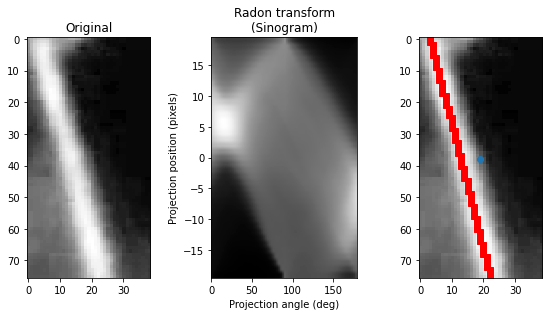

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = cv2.imread("/content/drive/MyDrive/ProteinTracking/iPAK4Tracking/Segmentation/11.png")
image_sqz = np.empty((image.shape[0],image.shape[1]))
image_sqz[:,:] = image[:,:,0] #Making the 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image_sqz, cmap=plt.cm.Greys_r)

#Performing Radon Transform#
theta = np.linspace(0.,180., max(image_sqz.shape), endpoint=False)
sinogram = radon(image_sqz, theta=theta)
#Finding the maximum value from forward radon transform
s_ori,a_ori = np.where(sinogram==np.max(sinogram)) #obatin the index of the maximum value in sinogram

#Interpretting the value in real physical meaning
s = s_ori-sinogram.shape[0]/2 #mapping the index back to the original domain
a_ori = a_ori*180/sinogram.shape[1] #mapping the index back to the origin
a = a_ori/180 *np.pi #converting the degree into radian

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, extent=(0, 180, -sinogram.shape[0]/2.0, sinogram.shape[0]/2.0),cmap=plt.cm.Greys_r, aspect='auto')

s=-s
x_intersect = image_sqz.shape[0]//2 + s*np.sin(a); y_intersect = image_sqz.shape[1]//2 - s*np.cos(a)


b = y_intersect - np.tan(a)*x_intersect
x_cal = np.asarray([i for i in range(image_sqz.shape[0])])
y_cal = np.asarray([i for i in range(image_sqz.shape[1])])
y_est = np.ceil(x_cal*np.tan(a)+b)
x_cal_sort=[]
y_est_sort=[]
for i in range(image_sqz.shape[0]):
  if y_est[i]>0 and y_est[i]<image_sqz.shape[1]:
    x_cal_sort.append(x_cal[i])
    y_est_sort.append(y_est[i])

print('y=tan(a)*x+%s'%b)
print(image_sqz.shape[0],image_sqz.shape[1],s_ori,a_ori,s,a,x_intersect,y_intersect)

ax3.imshow(image_sqz, cmap=plt.cm.Greys_r)
ax3.plot(y_est_sort,x_cal_sort,'rs')
ax3.plot(image_sqz.shape[1]//2, image_sqz.shape[0]//2, 'o')

fig.tight_layout()
plt.show()

In [ ]:
print(x_cal_sort,y_est_sort)
distance = np.sqrt((x_cal_sort[-1]-x_cal_sort[0])**2 + (y_est_sort[-1]-y_est_sort[0])**2)
print(distance)
a=np.array([x_cal_sort[0],y_est_sort[0]])
b=np.array([x_cal_sort[-1],y_est_sort[-1]])
print(np.linalg.norm(a-b))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75] [3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0]
77.3692445355388
77.3692445355388


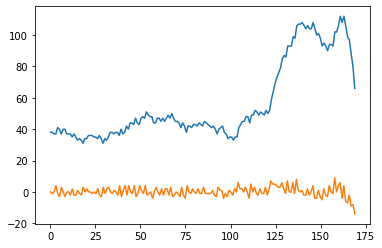

In [ ]:
yy=[]
for i in range(len(x_cal_sort)):
  #print(image_sqz[int(x_cal_sort[i]),int(y_est_sort[i])])
  yy.append(image_sqz[int(x_cal_sort[i]),int(y_est_sort[i])])

y_diff = np.diff(yy)
xx = np.linspace(0,len(x_cal_sort),len(x_cal_sort)-1)
plt.plot(np.linspace(0,len(x_cal_sort),len(x_cal_sort)),yy)
plt.plot(xx,y_diff)

In [ ]:
print(list(y_diff).index(min(y_diff)))

33


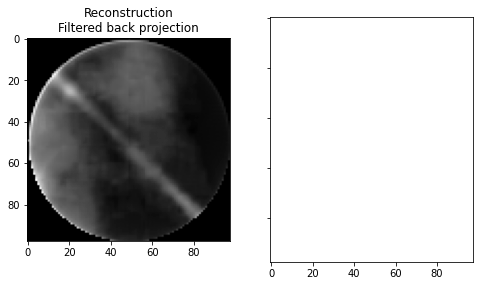

In [ ]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')



imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.show()

In [ ]:
print(image_sqz.shape,sinogram.shape)
print(np.where(sinogram==np.max(sinogram)))

(98, 109) (98, 109)
(array([46]), array([28]))


# Plotting

<ipython-input-35-fdc6ad51aa57>:43: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*times)+c


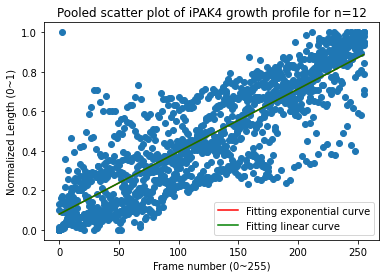

In [ ]:
#Multiple Regression Performing#
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
def Normalization(x):
    return [(float(i)-min(x))/float(max(x)-min(x)) for i in x]
result_sec12 = np.load('/content/drive/MyDrive/ProteinTracking/iPAK4/v8x_100EP/section12.npy', allow_pickle=True).item()
result_sec14 = np.load('/content/drive/MyDrive/ProteinTracking/iPAK4/v8x_100EP/section14.npy', allow_pickle=True).item()
result_sec5 = np.load('/content/drive/MyDrive/ProteinTracking/iPAK4/v8x_100EP/section5.npy', allow_pickle=True).item()
result_sec9 = np.load('/content/drive/MyDrive/ProteinTracking/iPAK4/v8x_100EP/section9.npy', allow_pickle=True).item()

Length = np.array(None)
times = np.array(None)
for id in [3,5,7,9]:
  data = np.asarray(Normalization(result_sec12[id]))
  time = np.linspace(0,255,data.shape[0])
  Length = np.hstack((Length,data))
  times = np.hstack((times,time))

for id in [43,50]:
  data = np.asarray(Normalization(result_sec14[id]))
  time = np.linspace(0,255,data.shape[0])
  Length = np.hstack((Length,data))
  times = np.hstack((times,time))

for id in [56,58,71]:
  data = np.asarray(Normalization(result_sec5[id]))
  time = np.linspace(0,255,data.shape[0])
  Length = np.hstack((Length,data))
  times = np.hstack((times,time))

for id in [134,147,152]:
  data = np.asarray(Normalization(result_sec9[id]))
  time = np.linspace(0,255,data.shape[0])
  Length = np.hstack((Length,data))
  times = np.hstack((times,time))

Length = Length[1:].astype(float)
times = times[1:].astype(float)

#Define the fitting curve
def exp_function(times,a,b,c):
  return a*np.exp(-b*times)+c

def lin_function(times,a,b):
  return a*times+b

coefficient_exp = opt.curve_fit(exp_function,times,Length,maxfev=5000)[0].astype(float)
coefficient_lin = opt.curve_fit(lin_function,times,Length,maxfev=5000)[0].astype(float)

Fit_length_exp = coefficient_exp[0]*np.exp(-coefficient_exp[1]*times)+coefficient_exp[2]  #exp_function(times,coefficient_exp[0],coefficient_exp[1],coefficient_exp[2])
Fit_length_lin = lin_function(times,coefficient_lin[0],coefficient_lin[1])

plt.figure()
plt.plot(times,Fit_length_exp,color='red',label='Fitting exponential curve')
plt.plot(times,Fit_length_lin,color='green',label='Fitting linear curve')
plt.xlabel('Frame number (0~255)');plt.ylabel('Normalized Length (0~1)');plt.title('Pooled scatter plot of iPAK4 growth profile for n=12')
plt.legend()
plt.scatter(times,Length)


<ipython-input-34-c876ad76d9c0>:13: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*times)+c


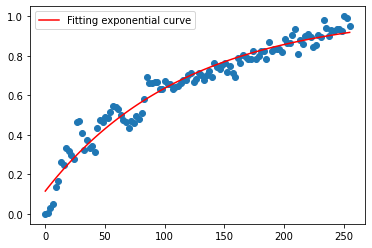

In [ ]:
Length=np.array(None); times = np.array(None)
data = np.asarray(Normalization(result_sec12[5]))
time = np.linspace(0,255,data.shape[0])
Length = np.hstack((Length,data))
times = np.hstack((times,time))


Length = Length[1:].astype(float)
times = times[1:].astype(float)

#Define the fitting curve
def exp_function(times,a,b,c):
  return a*np.exp(-b*times)+c

def lin_function(times,a,b):
  return a*times+b

coefficient_exp = opt.curve_fit(exp_function,times,Length,maxfev=5000)[0].astype(float)
coefficient_lin = opt.curve_fit(lin_function,times,Length,maxfev=5000)[0].astype(float)
Fit_length_exp = coefficient_exp[0]*np.exp(-coefficient_exp[1]*times)+coefficient_exp[2]  #exp_function(times,coefficient_exp[0],coefficient_exp[1],coefficient_exp[2])
Fit_length_lin = lin_function(times,coefficient_lin[0],coefficient_lin[1])

plt.figure()
plt.plot(times,Fit_length_exp,color='red',label='Fitting exponential curve')
#plt.plot(times,Fit_length_lin,color='green',label='Fitting linear curve')
plt.legend()
plt.scatter(times,Length)
